# Q1. CAPM模型中的alpha值，经常被投资者用来作为投资决策的依据，一般来讲投资者会选择持有alpha较大的股票，现在，假设市场投资组合的收益率为10%,无风险利率为4%，A公司的β值为1.2，预期收益率为9%，而B公司的β值为1.3，预期收益率为12%，那么投资者应该选择那只股票？

 α=Ri−Rf−βi∗(E(Rm)−Rf)




E(Ri): 资产期望回报率


Rf: 无风险利率
βi: 资产Beta系数，描述资产与市场相关性


βi=Cov(Ri,Rm)Var(Rm)
βi=Cov(Ri,Rm)Var(Rm)


E(Rm): 市场期望回报率


E(Rm)−Rf: 市场风险溢价补偿


E(Ri)−Rf: 资产风险溢价补偿


α>0，表示一基金或股票的价格可能被低估，建议买入。亦即表示该基金或股票以投资技术获得平均比预期回报大的实际回报。


　　
α<0，表示一基金或股票的价格可能被高估，建议卖空。亦即表示该基金或股票以投资技术获得平均比预期回报小的实际回报。


　　
α=0，表示一基金或股票的价格准确反映其内在价值，未被高估也未被低估。亦即表示该基金或股票以投资技术获得平均与预期回报相等的实际回报。




αA=0.09-0.04-1.2*（0.1-0.04）=0.05-1.2*0.06=0.05-0.072=-0.022
αB=0.12-0.04-1.3*（0.1-0.04）=0.08-1.3*0.06=0.08-0.078=0.002


得出：αB>0，应该选择B公司的这个股票。

In [1]:
RiA = 0.09
RiB = 0.12
Rf = 0.04
betaA = 1.2
betaB = 1.3
Rm = 0.1

可以看出，A公司的收益率0.09要小于市场投资组合收益率10%，而要承担比市场投资组合更高的风险（betaA>1)；

显然投资B公司的股票要更划算！

# Q2. 获取中国农业银行2014年的股票数据，并建立CAPM模型，市场组合收益率用本次课程的数据，无风险利率为3.6%。

下载农业银行的数据代码为：
```
import pandas_datareader.data as web
nyyh = web.DataReader('601288.SS','yahoo', dt.datetime(2014,1,1),dt.datetime(2014,12,31))
```




In [4]:
import datetime as dt

In [5]:
import pandas_datareader.data as web
nyyh = web.DataReader('601288.SS','yahoo', dt.datetime(2014,1,1),dt.datetime(2014,12,31))

In [6]:
nyyh.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,2.48,2.45,2.48,2.47,58007158.0,1.804129
2014-01-03,2.47,2.44,2.46,2.46,65319035.0,1.796825
2014-01-06,2.46,2.41,2.46,2.44,103628249.0,1.782217
2014-01-07,2.43,2.41,2.42,2.43,62578367.0,1.774912
2014-01-08,2.43,2.41,2.42,2.42,80706713.0,1.767608


In [8]:
#Python计算但资产的风险情况
import os
import pandas as pd
indexcd = pd.read_csv("TRD_Index.csv",index_col = 'Trddt')
#获取中证流通指数的收益率
mktcd = indexcd[indexcd.Indexcd ==902]
mktret = pd.Series(mktcd.Retindex.values,index = pd.to_datetime(mktcd.index))
mktret.name= 'market'

mktret = mktret['2014-01-01':'2014']

In [9]:
#将新安股份收益率和市场收益率数据进行合并，计算风险溢价
Ret = pd.merge(pd.DataFrame(mktret),pd.DataFrame(nyyh['Ret']),left_index=True,right_index=True,
               how ='inner')
#计算无风险收益率
rf = 1.036**(1/365) -1
Ret['risk_premium'] = Ret['market'] - rf

In [20]:
nyyh['Ret'] = (nyyh['Close'] - nyyh['Open'])/nyyh['Open'] - rf

Text(0.5, 1.0, 'nyyh return VS market return')

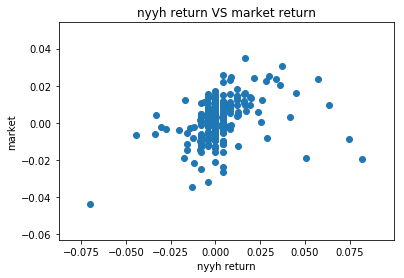

In [21]:
#绘制新安股份和中证指数的散点图
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Ret['Ret'],Ret['market'])
plt.xlabel('nyyh return'); plt.ylabel('market')
plt.title('nyyh return VS market return')

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
Ret.head()

,market,Ret,risk_premium
Trddt,,,
2014-01-02,0.002563,-0.004032,0.002466
2014-01-03,-0.009009,0.000000,-0.009106
2014-01-06,-0.024650,-0.008130,-0.024747
2014-01-07,0.003800,0.004132,0.003703
2014-01-08,0.004128,0.000000,0.004031


In [24]:
import numpy as np

In [25]:
lr = LinearRegression()
lr.fit(np.array(Ret['risk_premium'].tolist()).reshape(-1, 1), Ret['Ret'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
lr.intercept_, lr.coef_

(0.0016955652016139885, array([0.46805527]))

# Q3
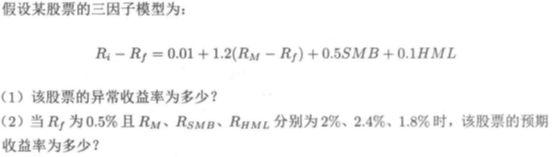

异常收益率是指某种证券的实际收益率与市场预期收益率之间的差值。

Ri - Rm

In [27]:
Ri = 0.01 + 1.2*(0.02-0.005) + 0.5*0.024 + 0.1 * 0.018 + 0.005
Ri

0.046799999999999994

# Q4. 读取problem21.txt文件中中远航运2014年股价数据以及ThreeFactors.txt文件中的2014年三因子数据，按照相关步骤建立三因子模型。

In [31]:
# 读取中远航运2014年股价数据
df = pd.read_csv('problem21.txt', sep='\s+', parse_dates=['Date'])
df.set_index('Date', inplace=True)
df.head()

,zhongxin,zyhy
Date,,
2014-01-01,3.87,3.51
2014-01-02,3.86,3.52
2014-01-03,3.80,3.35
2014-01-06,3.74,3.23
2014-01-07,3.73,3.20


In [42]:
# 计算收益率
s = ((df['zyhy']-df['zyhy'].shift(1))/df['zyhy']).dropna()
s[:5]

Date
2014-01-02    0.002841
2014-01-03   -0.050746
2014-01-06   -0.037152
2014-01-07   -0.009375
2014-01-08   -0.009464
Name: zyhy, dtype: float64

In [36]:
ThreeFactors = pd.read_csv('ThreeFactors.txt', sep='\s+', parse_dates=['TradingDate'])
ThreeFactors.set_index('TradingDate', inplace=True)
ThreeFactors.head()

,MarkettypeID,RiskPremium1,RiskPremium2,SMB1,SMB2,HML1,HML2
TradingDate,,,,,,,
1992-01-30,P9710,0.0098,0.0068,-0.000193,-0.003945,0.001878,0.001132
1992-01-31,P9710,0.0138,0.0098,0.007597,0.006065,-0.003275,-0.002141
1992-02-01,P9710,0.0058,0.0058,0.011516,0.009544,-0.006743,-0.006776
1992-02-02,P9710,0.0068,0.0068,0.002621,0.002467,0.004255,0.004255
1992-02-03,P9710,0.0058,0.0068,0.006923,0.007519,-0.009798,-0.009623


In [37]:
# 获取2014年的三因子数据
ThreeFactors = ThreeFactors['2014']
ThreeFactors.head()

,MarkettypeID,RiskPremium1,RiskPremium2,SMB1,SMB2,HML1,HML2
TradingDate,,,,,,,
2014-01-02,P9710,-0.001081,0.000919,-0.017003,-0.014747,-0.017604,-0.019279
2014-01-03,P9710,-0.010081,-0.009081,-0.008988,-0.005061,-0.013391,-0.015440
2014-01-06,P9710,-0.018081,-0.020081,0.015599,0.015898,0.009912,0.009018
2014-01-07,P9710,0.000919,0.001919,-0.008349,-0.007034,-0.014506,-0.015003
2014-01-08,P9710,-0.000081,0.001919,-0.005764,-0.001121,-0.017683,-0.019687


In [43]:
ThreeFactors['Ret'] = s
ThreeFactors.head()

,MarkettypeID,RiskPremium1,RiskPremium2,SMB1,SMB2,HML1,HML2,Ret
TradingDate,,,,,,,,
2014-01-02,P9710,-0.001081,0.000919,-0.017003,-0.014747,-0.017604,-0.019279,0.002841
2014-01-03,P9710,-0.010081,-0.009081,-0.008988,-0.005061,-0.013391,-0.015440,-0.050746
2014-01-06,P9710,-0.018081,-0.020081,0.015599,0.015898,0.009912,0.009018,-0.037152
2014-01-07,P9710,0.000919,0.001919,-0.008349,-0.007034,-0.014506,-0.015003,-0.009375
2014-01-08,P9710,-0.000081,0.001919,-0.005764,-0.001121,-0.017683,-0.019687,-0.009464


In [44]:
ThreeFactors.columns

Index(['MarkettypeID', 'RiskPremium1', 'RiskPremium2', 'SMB1', 'SMB2', 'HML1',
       'HML2', 'Ret'],
      dtype='object')

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(ThreeFactors[['RiskPremium1', 'RiskPremium2', 'SMB1', 'SMB2', 'HML1','HML2']], ThreeFactors['Ret'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
lr.coef_

array([-2.64156505,  3.60204897, -1.09020599,  0.41850609, -2.05665879,
        3.01835166])

In [47]:
lr.intercept_

0.0015748483691422044